In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import os, sys
import glob
from math import *
from scipy.ndimage import gaussian_filter1d
import scipy
from datetime import date
from statannotations.Annotator import Annotator



sns.set_style("ticks")
today = date.today()

%matplotlib inline
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/margotlautenswork/opt/anaconda3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['modf', 'exp', 'gcd', 'ldexp', 'hypot', 'sin', 'trunc', 'e', 'degrees', 'pi', 'log2', 'cos', 'fmod', 'cosh', 'isclose', 'fabs', 'floor', 'frexp', 'nextafter', 'remainder', 'tan', 'inf', 'copysign', 'isfinite', 'sqrt', 'log10', 'nan', 'tanh', 'log', 'radians', 'expm1', 'isinf', 'isnan', 'sinh', 'log1p', 'ceil', 'prod', 'lcm', 'gamma']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
# This is just boilerplate code to make the figures look good
sizer = 25
def format_figure(ax):
    '''Standard format to apply to all plots'''
    
    title_size = 30#sizer * 1.5
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(sizer)
    for item in [ax.title, ax.xaxis.label, ax.yaxis.label]:
        item.set_fontsize(title_size)    
    
    #plt.setp(ax.spines.values(), linewidth=2)
    ax.xaxis.set_tick_params(width=2)
    ax.yaxis.set_tick_params(width=2)
    
    return ax

def format_legend(legend):
    for label in legend.get_texts():
        label.set_fontsize(sizer*0.8)

    for label in legend.get_lines():
        label.set_linewidth(10)  # the legend line width
        
    return legend
        

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

def wide_to_long(d):
    if np.ndim(d)==3:
        l=np.shape(d)[1]
        split_data=np.concatenate([d[:,range(0,l,2),:],d[:,range(0,l,2),:]],0)
    elif np.ndim(d)==2:
        l=np.shape(d)[0]
        split_data=np.stack([d[range(0,l,2),:],d[range(0,l,2),:]],0)

    newshape_data=np.swapaxes(split_data,0,1)
    return newshape_data

sns.set_style("ticks")


# Set your default plot settings here.
what_for=0
if what_for==0: #for computer display
    leg_pos=0 #0 for upper left, 1 for upper right
    l=None #width of lines
    e=None #width of errorbars
    ec=None #color of errorbars
    y=1.6 #ylim
elif what_for==1: #for presentation
    leg_pos=1 #0 for upper left, 1 for upper right
    l=4 #width of lines
    e=1.5 #width of errorbars
    ec="black"
    y=1.5 #ylim

In [3]:
save_dir='/Users/margotlautenswork/Documents/Data/Several/18hr Assay/'

titl='fullset'
date='aug2018_oct2020'

concs = [0,200,300]

r=pd.read_csv("05082021_15hrdata.csv")
r

,concentration,phenotype,drug,bio_rep,timepoint,norm_method,tech_rep,mobility_score_x,mobility_score_y,log2FMS,FMS
0,0,GFP,0.8% DMSO,25,10,N2_norm,0.5,0.681761,0.681761,-0.001068,1.000000
1,0,GFP,0.8% DMSO,25,10,T0_norm,0.5,0.681761,0.681761,-0.001068,1.000000
2,0,GFP,0.8% DMSO,25,10,con_norm,0.5,0.681761,0.681761,-0.001068,1.000000
3,0,GFP,0.8% DMSO,25,10,dose_norm,0.5,0.681761,0.681761,-0.001068,1.000000
4,0,GFP,0.8% DMSO,25,20,N2_norm,0.5,0.560628,0.560628,-0.000006,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
55831,300,y57G11C.3,M9,29,180,dose_norm,0.0,0.000010,0.023085,-11.172761,0.000433
55832,300,y57G11C.3,M9,29,190,N2_norm,0.0,0.000010,0.053629,-12.388808,0.000186
55833,300,y57G11C.3,M9,29,190,T0_norm,0.0,0.000010,0.276744,-14.756266,0.000036
55834,300,y57G11C.3,M9,29,190,con_norm,0.0,0.000010,0.045209,-12.142404,0.000221


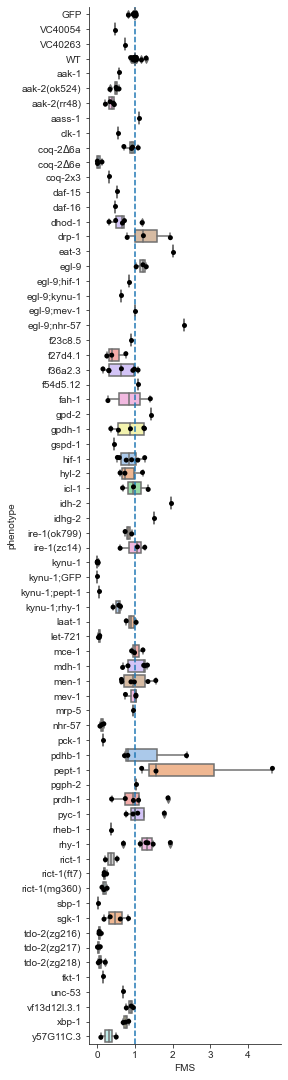

In [4]:
selected_norm=r
save=False

tps=[170,180,190]

dt=(r.query("norm_method=='dose_norm'&drug=='M9'&concentration==200")
    .reset_index()
   )


dt=(dt[dt.timepoint.isin(tps)])
           
dt=(dt.groupby(['concentration','phenotype','drug','bio_rep','timepoint','norm_method'])
      .median()
    .groupby(['concentration','phenotype','bio_rep','tech_rep'])
     .median()
     .loc[:,['FMS','log2FMS']]
    .reset_index())

plt.figure(figsize=(4,15))
g=sns.boxplot(data=dt,
              #kind='box',
              x='FMS',
              y='phenotype',
              palette="pastel",
              #hue='concentration'
             )


g=sns.stripplot(data=dt,
              x='FMS',
              y='phenotype',
              #color='bio_rep',
             jitter=True,
             dodge=True,
             color='black'
               )

g.axvline(1, ls='--')
sns.despine()
#plt.yscale('log')
#g.set(xlim=(-0.1, 1.8))
plt.tight_layout(pad=0.7, w_pad=1, h_pad=1)

# Save/Show the finished plot!
if save:    
    dir_time_plot=save_dir+'full_boxplot_dose_norm_18hr_3avg_'+today.strftime("%d%m%Y")+'.pdf'
    plt.savefig(dir_time_plot, transparent=True)
plt.show()




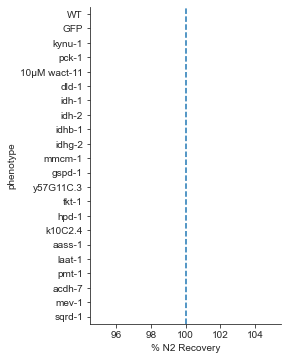

In [5]:
selected_norm=r
save=False

mts=["kynu-1",
     "pck-1",
     "10µM wact-11","dld-1","idh-1","idh-2","idhb-1","idhg-2",
     "mmcm-1","mce-1",
     "gspd-1","y57G11C.3","tkt-1",
     "hpd-1","fah-1",
     "aass-1","laat-1",
     "pmt-1",
     "acdh-7", "mev-1", "sqrd-1"
    ]
tps=[170,180,190]

dt=(r.query("norm_method=='dose_norm'&drug=='M9'&concentration==200")
 .reset_index()
 .groupby("bio_rep")
 .filter(lambda x: (x.phenotype.isin(mts)).any())
 )
mts.extend(["WT","GFP"])

dt=(dt[dt.phenotype.isin(mts)])

dt=dt[dt.timepoint.isin(tps)]
           
dt2=(dt.groupby(['concentration','phenotype','drug','bio_rep','timepoint','norm_method'])
      .median()
    .groupby(['concentration','phenotype','bio_rep','tech_rep'])
    .median()
    .loc[:,['FMS','log2FMS']]
    .reset_index()
   )

dt2['FMS'] = 100 * dt['FMS']

plt.figure(figsize=(4,5))
g=sns.boxplot(data=dt2,
              #kind='box',
              x='FMS',
              y='phenotype',
              palette="pastel",
              order=["WT","GFP",
                     "kynu-1",
     "pck-1",
     "10µM wact-11",
     "dld-1","idh-1","idh-2","idhb-1","idhg-2",
     "mmcm-1",
     "gspd-1","y57G11C.3","tkt-1",
     "hpd-1","k10C2.4",
     "aass-1","laat-1",
     "pmt-1",
     "acdh-7", "mev-1", "sqrd-1"
                    ]
              #hue='concentration'
             )


g=sns.stripplot(data=dt2,
              x='FMS',
              y='phenotype',
              #color='bio_rep',
             jitter=True,
             dodge=True,
             color='black',
            order=["WT","GFP",
                   "kynu-1",
     "pck-1",
     "10µM wact-11",
     "dld-1","idh-1","idh-2","idhb-1","idhg-2",
     "mmcm-1",
     "gspd-1","y57G11C.3","tkt-1",
     "hpd-1","k10C2.4",
     "aass-1","laat-1",
     "pmt-1",
     "acdh-7", "mev-1", "sqrd-1"
                  ]
               )

g.axvline(100, ls='--')
sns.despine()
g.set(xlabel='% N2 Recovery')
#plt.yscale('log')
#g.set(xlim=(-0.1, 180))
plt.tight_layout(pad=0.7, w_pad=1, h_pad=1)

# Save/Show the finished plot!
if save:    
    dir_time_plot=save_dir+'limited_boxplot_dose_norm_18hr_3avg_'+today.strftime("%d%m%Y")+'.pdf'
    plt.savefig(dir_time_plot, transparent=True)
plt.show()



<Figure size 1008x720 with 0 Axes>

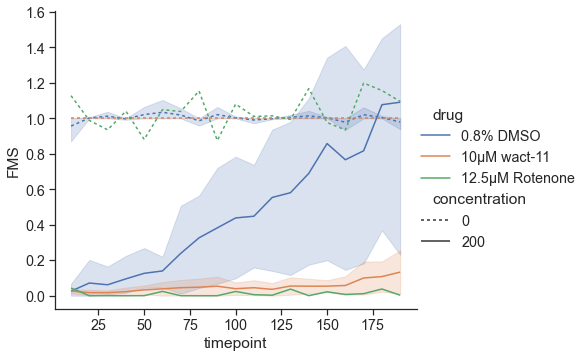

In [18]:
drug=["10µM wact-11","12.5µM Rotenone"]

dt=(r.query("norm_method=='N2_norm'&phenotype=='WT'&concentration!=300")
    .reset_index()
    .groupby("bio_rep")
    .filter(lambda x: (x.drug.isin(drug)).any())
 )
drug.extend(["0.8% DMSO"])

selected_norm=(dt[dt.drug.isin(drug)]
               .reset_index()
               .groupby(['concentration','phenotype','drug','bio_rep','timepoint','norm_method'])
               .median()
              )

#errorbars=True
save=True

sns.set(font_scale=1.3)
sns.set_style("ticks")
plt.figure(figsize=(14,10))

sns.relplot(
    data=selected_norm, 
    x="timepoint", 
    y="FMS",
    #col="region", 
    hue="drug", 
    style="concentration",
    kind="line",
    legend='brief',
    dashes=[(2, 2), (2, 0)],
    aspect=1.2
)


g.set(ylim=(0, 1.4))
g.set(xlabel='Timecourse (min)')
#g._legend.set_title("KCN Concentration (µM)   ")
#g._legend._legend_box.align = "left"
#g._legend.set_bbox_to_anchor([1.1,.5])

#g.set_xticklabels(rotation=45, horizontalalignment='right')
#g.fig.suptitle('$\it{rhy-1(ok1402)}$')
#plt.subplots_adjust(right=0.28)

# Save/Show the finished plot!
if save:    
    dir_time_plot=save_dir+'drugs_timecourse_'+today.strftime("%d%m%Y")+'.svg'
    plt.savefig(dir_time_plot, bbox_inches='tight')
plt.show()

dt.to_csv(save_dir+'drugs_dataframe_dose_norm_3avg_'+today.strftime("%d%m%Y")+'.csv')




<Figure size 1008x720 with 0 Axes>

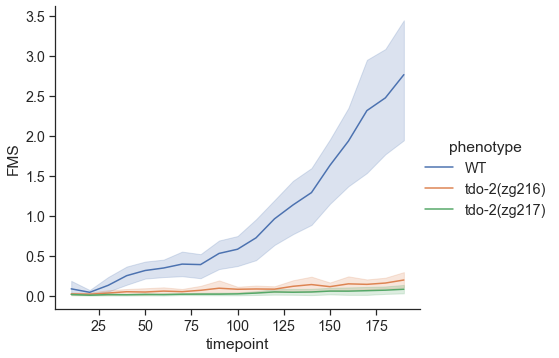

In [32]:
mts=["tdo-2(zg216)","tdo-2(zg217)"]

dt=(r.query("norm_method=='N2_norm'&drug=='M9'&concentration==200")
    .reset_index()
    .groupby("bio_rep")
    .filter(lambda x: (x.phenotype.isin(mts)).any())
 )
mts.extend(["WT","GFP"])

selected_norm=(dt[dt.phenotype.isin(mts)]
               .reset_index()
               .groupby(['concentration','phenotype','drug','bio_rep','timepoint','norm_method'])
               .mean()
              )

#errorbars=True
save=True

sns.set(font_scale=1.3)
sns.set_style("ticks")
plt.figure(figsize=(14,10))

sns.relplot(
    data=selected_norm, 
    x="timepoint", 
    y="FMS",
    #col="region", 
    hue="phenotype", 
    #style="concentration",
    kind="line",
    legend='brief',
    dashes=[(2, 2), (2, 0)],
    aspect=1.2
)


g.set(ylim=(0, 1.4))
g.set(xlabel='Timecourse (min)')
#g._legend.set_title("KCN Concentration (µM)   ")
#g._legend._legend_box.align = "left"
#g._legend.set_bbox_to_anchor([1.1,.5])

#g.set_xticklabels(rotation=45, horizontalalignment='right')
#g.fig.suptitle('$\it{rhy-1(ok1402)}$')
#plt.subplots_adjust(right=0.28)

# Save/Show the finished plot!
if save:    
    dir_time_plot=save_dir+'tdo2_timecourse_'+today.strftime("%d%m%Y")+'.svg'
    plt.savefig(dir_time_plot, bbox_inches='tight')
plt.show()

dt[['concentration','phenotype','drug','bio_rep', 'tech_rep','timepoint','mobility_score_x']].to_csv(save_dir+'tdo2_dataframe_dose_norm_3avg_'+today.strftime("%d%m%Y")+'.csv')





/Users/margotlautenswork/opt/anaconda3/lib/python3.8/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


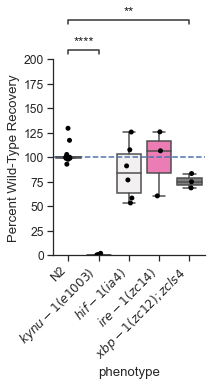

In [4]:
##HYPOXIA##

selected_norm=r
save=True

mts=["kynu-1",
     "hif-1",#"nhr-57","egl-9",
     #"ire-1(ok799)",
     "ire-1(zc14)","xbp-1",
    ]

tps=[170,180,190]

order=["WT",
       "kynu-1",
       "hif-1",#"nhr-57","egl-9",
       #"ire-1(ok799)",
       "ire-1(zc14)","xbp-1",
      ]
#pairs=[(order[0],order[i]) for i in range(1,len(order))]
pairs=[('WT','kynu-1'),('WT','xbp-1')]
x='phenotype'
y='FMS'

dt=(r.query("norm_method=='dose_norm'&drug=='M9'&concentration==200")
 .reset_index()
 .groupby("bio_rep")
 .filter(lambda x: (x.phenotype.isin(mts)).any())
 )
mts.extend(["WT"])



dt=(dt[dt.phenotype.isin(mts)])

dt=dt[dt.timepoint.isin(tps)]
           
dt2=(dt.groupby(['concentration','phenotype','drug','bio_rep','timepoint','norm_method'])
     .median()
    .groupby(['concentration','phenotype','bio_rep','tech_rep'])
     .median()
     .loc[:,['mobility_score_x','FMS','log2FMS']]
    .reset_index())

dt2['FMS'] = 100 * dt2['FMS']

plt.figure(figsize=(0.6363636364*len(dt2[x].value_counts()),5))
sns.set(font_scale=1.1)
sns.set_style("ticks")

g=sns.boxplot(data=dt2,
              y=y,
              x=x,
              palette=sns.light_palette("grey",1,reverse=True)+
                       sns.light_palette("violet",1, reverse=True)+
                       sns.light_palette("hotpink",2),
              order=order,
              showfliers = False
              #hue='concentration'
             )


g=sns.stripplot(data=dt2,
              y=y,
              x=x,
              #color='bio_rep',
             jitter=True,
             dodge=True,
             color='black',
            order=order
               )

g.axhline(100, ls='--')
sns.despine()
#plt.yscale('log')
g.set(ylim=(0, 200))
g.set(ylabel='Percent Wild-Type Recovery')
plt.tight_layout(pad=1.2, w_pad=1, h_pad=1)
plt.subplots_adjust(bottom=0.4)

g.set_xticklabels(["N2",
                   "$\it{kynu-1(e1003)}$",
                   "$\it{hif-1(ia4)}$",#"$\it{nhr-57(syb242)}$","$\it{egl-9(n486)}$",
                   #"$\it{ire-1(ok799)}$",
                   "$\it{ire-1(zc14)}$","$\it{xbp-1(zc12);zcls4}$",
                       ], 
                  rotation=45, horizontalalignment='right')

annotator = Annotator(g, pairs, data=dt2, x=x, y=y, order=order)
annotator.configure(test='t-test_welch', text_format='star', loc='outside', verbose=False)
annotator.apply_and_annotate()

# Save/Show the finished plot!
if save:    
    dir_time_plot=save_dir+'hypoxia_boxplot_dose_norm_18hr_3avg_'+today.strftime("%d%m%Y")+'.svg'
    plt.savefig(dir_time_plot, transparent=True)
plt.show()


dt[['concentration','phenotype','drug','bio_rep', 'tech_rep','timepoint','mobility_score_x']].to_csv(save_dir+'hypoxia_dataframe_dose_norm_3avg_'+today.strftime("%d%m%Y")+'.csv')


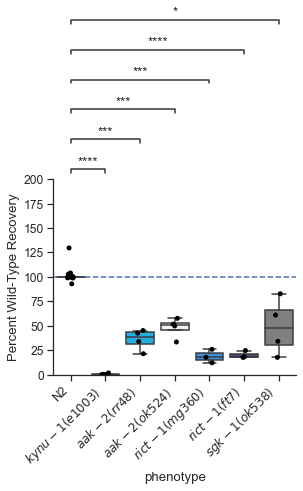

In [5]:
##ANOXIA##

selected_norm=r
save=True

mts=["kynu-1",
     #"aak-1",
     "aak-2(rr48)","aak-2(ok524)", 
     "rict-1(mg360)","rict-1(ft7)",
     "sgk-1"
    ]

tps=[170,180,190]

order=["WT",
       "kynu-1",
       #"aak-1",
       "aak-2(rr48)","aak-2(ok524)",
       "rict-1(mg360)","rict-1(ft7)",
       "sgk-1"
      ]

pairs=[(order[0],order[i]) for i in range(1,len(order))]
#pairs=[('WT','kynu-1'),('WT','xbp-1')]
x='phenotype'
y='FMS'

dt=(r.query("norm_method=='dose_norm'&drug=='M9'&concentration==200")
 .reset_index()
 .groupby("bio_rep")
 .filter(lambda x: (x.phenotype.isin(mts)).any())
 )
mts.extend(["WT"])

dt=(dt[dt.phenotype.isin(mts)])

dt=dt[dt.timepoint.isin(tps)]
           
dt2=(dt.groupby(['concentration','phenotype','drug','bio_rep','timepoint','norm_method'])
     .median()
    .groupby(['concentration','phenotype','bio_rep','tech_rep'])
     .median()
     .loc[:,['mobility_score_x','FMS','log2FMS']]
    .reset_index())

dt2['FMS'] = 100 * dt2[y]

plt.figure(figsize=(0.6363636364*len(dt2[x].value_counts()),5))
sns.set(font_scale=1.1)
sns.set_style("ticks")

g=sns.boxplot(data=dt2,
              #kind='box',
              y=y,
              x=x,
              palette=sns.light_palette("grey",1, reverse=True)+
                       sns.light_palette("deepskyblue",2)+
                       sns.light_palette("dodgerblue",2)+
                       sns.light_palette("darkslateblue",1, reverse=True),
              order=order,
              showfliers = False
              #hue='concentration'
             )


g=sns.stripplot(data=dt2,
              y=y,
              x=x,
              #color='bio_rep',
             jitter=True,
             dodge=True,
             color='black',
            order=order
               )

g.axhline(100, ls='--')
sns.despine()
#plt.yscale('log')
g.set(ylim=(0, 200))
g.set(ylabel='Percent Wild-Type Recovery')
plt.tight_layout(pad=1.2, w_pad=1, h_pad=1)
plt.subplots_adjust(bottom=0.4)

g.set_xticklabels(["N2",
                   "$\it{kynu-1(e1003)}$",
                    #"$\it{aak-1}$",
                   "$\it{aak-2(rr48)}$","$\it{aak-2(ok524)}$",
                   "$\it{rict-1(mg360)}$","$\it{rict-1(ft7)}$",
                   "$\it{sgk-1(ok538)}$",
                       ], 
                  rotation=45, horizontalalignment='right')

annotator = Annotator(g, pairs, data=dt2, x=x, y=y, order=order)
annotator.configure(test='t-test_welch', text_format='star', loc='outside', verbose=False)
annotator.apply_and_annotate()

# Save/Show the finished plot!
if save:    
    dir_time_plot=save_dir+'anoxia_boxplot_dose_norm_18hr_3avg_'+today.strftime("%d%m%Y")+'.svg'
    plt.savefig(dir_time_plot, transparent=True)
plt.show()


dt[['concentration','phenotype','drug','bio_rep', 'tech_rep','timepoint','mobility_score_x']].to_csv(save_dir+'anoxia_dataframe_dose_norm_3avg_'+today.strftime("%d%m%Y")+'.csv')



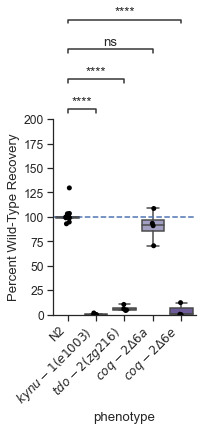

In [34]:
##RQ Synthesis##
selected_norm=r
save=True

mts=["tdo-2(zg216)",#"tdo-2(zg217)","tdo-2(zg218)",
     "kynu-1",
     "coq-2$\Delta$6a","coq-2$\Delta$6e"
    ]
order=["WT",
       "kynu-1",
       "tdo-2(zg216)",#"tdo-2(zg217)","tdo-2(zg218)",
       "coq-2$\Delta$6a","coq-2$\Delta$6e"
      ]

pairs=[(order[0],order[i]) for i in range(1,len(order))]
#pairs=[('WT','kynu-1'),('WT','xbp-1')]
x='phenotype'
y='FMS'

tps=[170,180,190]

dt=(r.query("norm_method=='dose_norm'&drug=='M9'&concentration==200")
 .reset_index()
 .groupby("bio_rep")
 .filter(lambda x: (x.phenotype.isin(mts)).any())
 )
mts.extend(["WT"])

dt=(dt[dt.phenotype.isin(mts)])

dt=dt[dt.timepoint.isin(tps)]
           
dt2=(dt.groupby(['concentration','phenotype','drug','bio_rep','timepoint','norm_method'])
    .median()
    .groupby(['concentration','phenotype','bio_rep','tech_rep'])
     .median()
     .loc[:,['mobility_score_x','FMS','log2FMS']]
    .reset_index())

dt2['FMS'] = 100 * dt2['FMS']

plt.figure(figsize=(0.6363636364*len(dt2['phenotype'].value_counts()),5))
sns.set(font_scale=1.1)
sns.set_style("ticks")

g=sns.boxplot(data=dt2,
              y=y,
              x=x,
              palette=sns.light_palette("grey",2)+
                       sns.color_palette("Purples",3),
              order=order,
              showfliers = False
             )


g=sns.stripplot(data=dt2,
              y=y,
              x=x,
              #color='bio_rep',
             jitter=True,
             dodge=True,
             color='black',
            order=order
               )

g.axhline(100, ls='--')
sns.despine()
#plt.yscale('log')
g.set(ylim=(0, 200))
g.set(ylabel='Percent Wild-Type Recovery')
plt.tight_layout(pad=1.2, w_pad=1, h_pad=1)
plt.subplots_adjust(bottom=0.4)

g.set_xticklabels(["N2",
                   "$\it{kynu-1(e1003)}$",
                   "$\it{tdo-2(zg216)}$",#"$\it{tdo-2(zg217)}$","$\it{tdo-2(zg218)}$",
                   "$\it{coq-2\Delta6a}$",'$\it{coq-2\Delta6e}$',
                       ], 
                  rotation=45, horizontalalignment='right')

annotator = Annotator(g, pairs, data=dt2, x=x, y=y, order=order)
annotator.configure(test='t-test_welch', text_format='star', loc='outside', verbose=False)
annotator.apply_and_annotate()

# Save/Show the finished plot!
if save:    
    dir_time_plot=save_dir+'RQSynth_boxplot_percent_norm_15hr_3avg_'+today.strftime("%d%m%Y")+'.svg'
    plt.savefig(dir_time_plot, transparent=True)
plt.show()


dt[['concentration','phenotype','drug','bio_rep', 'tech_rep','timepoint','mobility_score_x']].to_csv(save_dir+'RQSynth_dataframe_dose_norm_3avg_'+today.strftime("%d%m%Y")+'.csv')


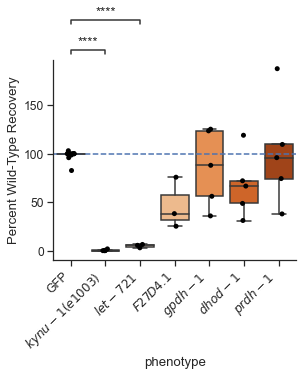

In [33]:
##RQ Binding##

selected_norm=r
save=True

mts=["kynu-1",
     #"10µM wact-11",
     "let-721","f27d4.1",
     "gpdh-1",
     "dhod-1",
     "prdh-1"
    ]

order=["GFP",
       "kynu-1",
     #"10µM wact-11",
     "let-721","f27d4.1",
     "gpdh-1",
     "dhod-1",
     "prdh-1"
      ]

#pairs=[(order[0],order[i]) for i in range(1,len(order))]
pairs=[('GFP','kynu-1'),('GFP','let-721')]
x='phenotype'
y='FMS'

tps=[170,180,190]

dt=(r.query("norm_method=='dose_norm'&drug=='M9'&concentration==200")
 .reset_index()
 .groupby("bio_rep")
 .filter(lambda x: (x.phenotype.isin(mts)).any())
 )
mts.extend(["GFP"])

dt=(dt[dt.phenotype.isin(mts)])

dt=dt[dt.timepoint.isin(tps)]
           
dt2=(dt.groupby(['concentration','phenotype','drug','bio_rep','timepoint','norm_method'])
    .median()
    .groupby(['concentration','phenotype','bio_rep','tech_rep'])
     .median()
     .loc[:,['mobility_score_x','FMS','log2FMS']]
    .reset_index())

dt2['FMS'] = 100 * dt2['FMS']

plt.figure(figsize=(0.6363636364*len(dt2['phenotype'].value_counts()),5))
sns.set(font_scale=1.1)
sns.set_style("ticks")

g=sns.boxplot(data=dt2,
              #kind='box',
              y=y,
              x=x,
              palette=sns.light_palette("grey",2)+
                       sns.color_palette("Oranges",5),
              order=order,
              showfliers = False
             )


g=sns.stripplot(data=dt2,
              y=y,
              x=x,
              #color='bio_rep',
             jitter=True,
             dodge=True,
             color='black',
            order=order
               )

g.axhline(100, ls='--')
sns.despine()
#plt.yscale('log')
#g.set(ylim=(0, 200))
g.set(ylabel='Percent Wild-Type Recovery')
plt.tight_layout(pad=1.2, w_pad=1, h_pad=1)
plt.subplots_adjust(bottom=0.4)

g.set_xticklabels(["GFP",
                   "$\it{kynu-1(e1003)}$",
                   #"10µM wact-11",
                   "$\it{let-721}$","$\it{F27D4.1}$",
                   "$\it{gpdh-1}$",
                   "$\it{dhod-1}$",
                   "$\it{prdh-1}$",
                       ], 
                  rotation=45, horizontalalignment='right')

annotator = Annotator(g, pairs, data=dt2, x=x, y=y, order=order)
annotator.configure(test='t-test_welch', text_format='star', loc='outside', verbose=False)
annotator.apply_and_annotate()

# Save/Show the finished plot!
if save:    
    dir_time_plot=save_dir+'QDHs_boxplot_percent_norm_15hr_3avg_'+today.strftime("%d%m%Y")+'.svg'
    plt.savefig(dir_time_plot, transparent=True)
plt.show()

dt[['concentration','phenotype','drug','bio_rep', 'tech_rep','timepoint','mobility_score_x']].to_csv(save_dir+'QDHs_dataframe_dose_norm_3avg_'+today.strftime("%d%m%Y")+'.csv')




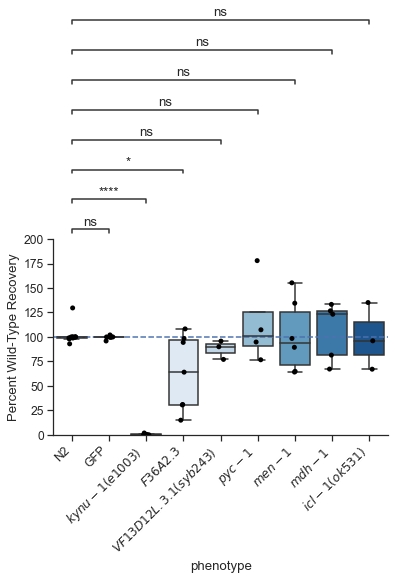

In [31]:
##RQ Metabolism##

selected_norm=r
save=True

mts=["kynu-1",
     "f36a2.3","vf13d12l.3.1","pyc-1",#"pdhb-1",
     "men-1","mdh-1","icl-1",#TCA
     #"mce-1" #Propionate
    ]
order=["WT","GFP",
       "kynu-1",
     "f36a2.3","vf13d12l.3.1","pyc-1",#"pdhb-1",
     "men-1","mdh-1","icl-1",#TCA
     #"mce-1" #Propionate
      ]

pairs=[(order[0],order[i]) for i in range(1,len(order))]
#pairs=[('WT','kynu-1'),('WT','xbp-1')]
x='phenotype'
y='FMS'

tps=[170,180,190]

dt=(r.query("norm_method=='dose_norm'&drug=='M9'&concentration==200")
 .reset_index()
 .groupby("bio_rep")
 .filter(lambda x: (x.phenotype.isin(mts)).any())
 )
mts.extend(["WT","GFP"])

dt=(dt[dt.phenotype.isin(mts)])

dt=dt[dt.timepoint.isin(tps)]
           
dt2=(dt.groupby(['concentration','phenotype','drug','bio_rep','timepoint','norm_method'])
    .median()
    .groupby(['concentration','phenotype','bio_rep','tech_rep'])
     .median()
     .loc[:,['mobility_score_x','FMS','log2FMS']]
    .reset_index())

dt2['FMS'] = 100 * dt2['FMS']

plt.figure(figsize=(0.6363636364*len(dt['phenotype'].value_counts()),5))
sns.set(font_scale=1.1)
sns.set_style("ticks")

g=sns.boxplot(data=dt2,
              #kind='box',
              y=y,
              x=x,
              palette=sns.light_palette("grey",3)+
                       sns.color_palette("Blues",6)
                       #sns.light_palette("chartreuse",1, reverse=True)
              ,
              order=order,
              showfliers = False
              #hue='concentration'
             )


g=sns.stripplot(data=dt2,
              y='FMS',
              x='phenotype',
              #color='bio_rep',
             jitter=True,
             dodge=True,
             color='black',
            order=order
               )

g.axhline(100, ls='--')
sns.despine()
#plt.yscale('log')
g.set(ylim=(0, 200))
g.set(ylabel='Percent Wild-Type Recovery')
plt.tight_layout(pad=1.2, w_pad=1, h_pad=1)
plt.subplots_adjust(bottom=0.4)

g.set_xticklabels(["N2","GFP",
                   "$\it{kynu-1(e1003)}$",
                   "$\it{F36A2.3}$","$\it{VF13D12L.3.1(syb243)}$","$\it{pyc-1}$",#"$\it{pdhb-1}$",
                   "$\it{men-1}$","$\it{mdh-1}$","$\it{icl-1(ok531)}$",
                   #"$\it{mce-1(ok243)}$",
                       ], 
                  rotation=45, horizontalalignment='right')

annotator = Annotator(g, pairs, data=dt2, x=x, y=y, order=order)
annotator.configure(test='t-test_welch', text_format='star', loc='outside', verbose=False)
annotator.apply_and_annotate()


# Save/Show the finished plot!
if save:    
    dir_time_plot=save_dir+'Metabolism_boxplot_percent_norm_15hr_3avg_'+today.strftime("%d%m%Y")+'.svg'
    plt.savefig(dir_time_plot, transparent=True)
plt.show()


dt[['concentration','phenotype','drug','bio_rep', 'tech_rep','timepoint','mobility_score_x']].to_csv(save_dir+'Metabolism_dataframe_dose_norm_3avg_'+today.strftime("%d%m%Y")+'.csv')




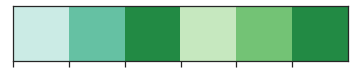

In [28]:
sns.palplot(sns.color_palette("BuGn",3)+sns.color_palette("Greens",3))

ValueError: Missing x value(s) `"idhb-1", "pmt-1", "hpd-1", "idh-1", "dld-1"` in phenotype (specified in `order`)

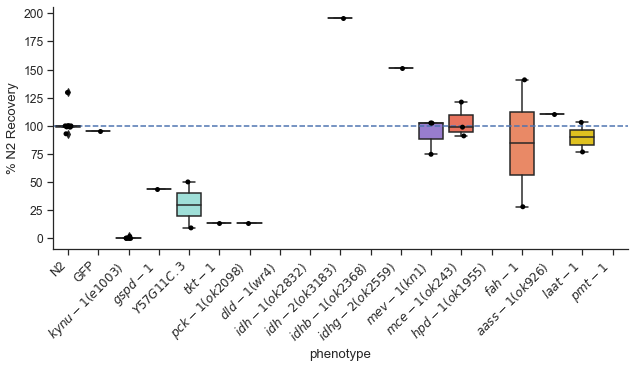

In [10]:


selected_norm=r
save=True

mts=["kynu-1",
     "pck-1",
     "dld-1","idh-1","idh-2","idhb-1","idhg-2",
     #"mmcm-1",
     "mce-1",
     "gspd-1","y57G11C.3","tkt-1",
     "hpd-1","fah-1",
     "aass-1","laat-1",
     "pmt-1","mev-1"
    ]


tps=[170,180,190]
x='phenotype'
y='FMS'

dt=(r.query("norm_method=='dose_norm'&drug=='M9'&concentration==200")
 .reset_index()
 .groupby("bio_rep")
 .filter(lambda x: (x.phenotype.isin(mts)).any())
 )
mts.extend(["WT","GFP"])

order=["WT","GFP","kynu-1",
                     "gspd-1","y57G11C.3","tkt-1",
                     "pck-1",
                     "dld-1","idh-1","idh-2","idhb-1","idhg-2",
                   "mev-1",
                     #"mmcm-1",
                     "mce-1",
                     "hpd-1","fah-1",
                     "aass-1","laat-1",
                     "pmt-1",
                    ]
pairs=[(order[0],order[i]) for i in range(1,len(order))]

dt=(dt[dt.phenotype.isin(mts)])

dt=dt[dt.timepoint.isin(tps)]
           
dt2=(dt
    .groupby(['concentration','phenotype','bio_rep','tech_rep'])
     .median()
     .loc[:,['mobility_score_x','FMS','log2FMS']]
    .reset_index())

dt2['FMS'] = 100 * dt2['FMS']

plt.figure(figsize=(0.6363636364*len(dt['phenotype'].value_counts()),5))
sns.set(font_scale=1.1)
sns.set_style("ticks")

g=sns.boxplot(data=dt2,
              #kind='box',
              y=y,
              x=x,
              palette=sns.light_palette("grey",3)+
                       sns.light_palette("turquoise",3)+
                       sns.light_palette("dodgerblue",1, reverse=True)+
                       sns.light_palette("mediumslateblue",5)+
                       sns.light_palette("mediumpurple",1, reverse=True)+
                       sns.light_palette("tomato",1,reverse=True)+
                       sns.light_palette("coral",2)+
                       sns.light_palette("gold",2)+
                       sns.light_palette("olive",1, reverse=True),
              order=order
              #hue='concentration'
             )


g=sns.stripplot(data=dt2,
              y=y,
              x=x,
              #color='bio_rep',
             jitter=True,
             dodge=True,
             color='black',
            order=order
               )

g.axhline(100, ls='--')
sns.despine()
#plt.yscale('log')
#g.set(xlim=(-0.1, 4))
g.set(ylabel='% N2 Recovery')
plt.tight_layout(pad=0.7, w_pad=1, h_pad=1)
plt.subplots_adjust(bottom=0.3)

g.set_xticklabels(["N2","GFP",
                   "$\it{kynu-1(e1003)}$",
                   "$\it{gspd-1}$","$\it{Y57G11C.3}$","$\it{tkt-1}$",
                   "$\it{pck-1(ok2098)}$",
                   "$\it{dld-1(wr4)}$","$\it{idh-1(ok2832)}$","$\it{idh-2(ok3183)}$","$\it{idhb-1(ok2368)}$","$\it{idhg-2(ok2559)}$",
                   "$\it{mev-1(kn1)}$",
                   #"$\it{mmcm-1(ok1637)}$",
                   "$\it{mce-1(ok243)}$",
                   "$\it{hpd-1(ok1955)}$","$\it{fah-1}$",
                   "$\it{aass-1(ok926)}$","$\it{laat-1}$",
                   "$\it{pmt-1}$",
                       ], 
                  rotation=45, horizontalalignment='right')

annotator = Annotator(g, pairs, data=dt2, x=x, y=y, order=order)
annotator.configure(test='t-test_welch', text_format='star', loc='outside', verbose=False)
annotator.apply_and_annotate()


# Save/Show the finished plot!
if save:    
    dir_time_plot=save_dir+'ANOVA_boxplot_percent_norm_15hr_3avg_'+today.strftime("%d%m%Y")+'.pdf'
    plt.savefig(dir_time_plot, transparent=True)
plt.show()






In [66]:
r.query("phenotype=='egl-9'&concentration=='200'&norm_method=='dose_norm'&drug=='M9'&timepoint=='180'").reset_index()



,index,concentration,phenotype,drug,bio_rep,timepoint,norm_method,tech_rep,mobility_score_x,mobility_score_y,log2FMS,FMS
0,25927,200,egl-9,M9,3,180,dose_norm,0.5,0.341658,0.293029,0.211166,1.165953
1,26003,200,egl-9,M9,10,180,dose_norm,1.0,0.292540,0.230442,0.344233,1.269476
2,26079,200,egl-9,M9,11,180,dose_norm,1.0,0.428270,0.414920,0.045686,1.032174


In [125]:
np.shape(rep27.iloc[0]['data'])

(4, 4, 19)

In [13]:
thesis_data=["kynu-1",
     "hif-1",#"nhr-57","egl-9",
     #"ire-1(ok799)",
     "ire-1(zc14)","xbp-1",
    "pck-1",
     "dld-1","idh-1","idh-2","idhb-1","idhg-2",
     #"mmcm-1",
     "mce-1",
     "gspd-1","y57G11C.3","tkt-1",
     "hpd-1","fah-1",
     "aass-1","laat-1",
     "pmt-1","mev-1",
        "f36a2.3","vf13d12l.3.1","pyc-1",#"pdhb-1",
     "men-1","mdh-1","icl-1",
         "let-721","f27d4.1",
     "gpdh-1",
     "dhod-1",
     "prdh-1",
    "tdo-2(zg216)","tdo-2(zg217)",
    "coq-2$\Delta$6a","coq-2$\Delta$6e",
    "aak-2(rr48)","aak-2(ok524)", 
     "rict-1(mg360)","rict-1(ft7)",
     "sgk-1"]


dt=(r.query("norm_method=='dose_norm'&drug=='M9'&concentration==200")
    .reset_index()
    .groupby("bio_rep")
    .filter(lambda x: (x.phenotype.isin(thesis_data)).any())
   )

thesis_data.extend(["WT","GFP"])

dt=(dt[dt.phenotype.isin(thesis_data)])
           
dt.to_csv("Appendix 3.csv")